In [38]:
import numpy as np
from astropy.table import Table
import pandas as pd
import matplotlib.pyplot as plt
import synthpop
from datetime import datetime

In [7]:
model=0
model = synthpop.SynthPop(default_config='macy_defaults.synthpop_conf',
                            model_name="Huston2025", name_for_output='Huston2025',
                            maglim=['WFC3_UVIS_F814W', 99,"remove"], 
                            chosen_bands=['WFC3_UVIS_F390W','WFC3_UVIS_F555W','WFC3_UVIS_F814W',
                                          'WFC3_IR_F110W','WFC3_IR_F160W'],
                            output_location="outputfiles/hst_bt",
                            extinction_map_kwargs={"name":"surot","project_3d":True,"dist_2d":8.15},
                            post_processing_kwargs=[{"name": "ProcessDarkCompactObjects","remove": True},
                                {"name": "ConvertMistMags", 
                                 "conversions": {"ST": ['WFC3_UVIS_F390W','WFC3_UVIS_F555W','WFC3_UVIS_F814W',
                                          'WFC3_IR_F110W','WFC3_IR_F160W']}}]
                         )
model.init_populations()



################################ Settings #################################
 338020 - # reading default parameters from
 338021 - default_config_file =  /Users/mhuston/Documents/synthpop/synthpop/config_files/macy_defaults.synthpop_conf 


# copy the following to a config file to redo this model generation -------
 338023 - {
    "l_set": null,
    "l_set_type": null,
    "b_set": null,
    "b_set_type": null,
    "random_seed": 392459169,
    "name_for_output": "Huston2025",
    "model_name": "Huston2025",
    "solid_angle": null,
    "solid_angle_unit": "deg^2",
    "sun": {
        "x": -8.178,
        "y": 0.0,
        "z": 0.017,
        "u": 12.9,
        "v": 245.6,
        "w": 7.78,
        "l_apex_deg": 56.24,
        "b_apex_deg": 22.54
    },
    "lsr": {
        "u_lsr": 1.8,
        "v_lsr": 233.4,
        "w_lsr": 0.53
    },
    "warp": {
        "r_warp": 7.72,
        "amp_warp": 0.06,
        "amp_warp_pos": null,
        "amp_warp_neg": null,
        "alpha_warp":

In [8]:
for i,field in enumerate(fields):
    l,b = coords[i]
    cat, _ = model.process_location(l_deg=l, b_deg=b, solid_angle=0.002, solid_angle_unit='deg^2')



############################# update location #############################
 681847 - # set location to: 
 681849 - l, b = (1.06 deg, -3.81 deg)
 681849 - # set solid_angle to:
 681850 - solid_angle = 2.000e-03 deg^2


############################# Generate Field ##############################


# Population 0;  bulge ----------------------------------------------------
 690401 - # From density profile (number density)
 690402 - expected_total_iMass = 250605.2491
 690402 - expected_total_eMass = 137000.7594
 690402 - average_iMass_per_star = 0.5739
 690402 - mass_loss_correction = 0.5467
 690403 - n_expected_stars = 436696.4928
 690404 - # Determine velocities when position are generated 


  0%|          | 0/437150 [00:00<?, ?it/s]

 697307 - # From Generated Field:
 697307 - generated_stars = 346444
 697312 - generated_total_iMass = 110972.3823
 697336 - generated_total_eMass = 110928.3467
 697342 - det_mass_loss_corr = 0.9996
 697599 - # Done


# Population 1;  halo -----------------------------------------------------
 697949 - # From density profile (number density)
 697949 - expected_total_iMass = 485.1850
 697949 - expected_total_eMass = 256.0481
 697949 - average_iMass_per_star = 0.5739
 697950 - mass_loss_correction = 0.5277
 697950 - n_expected_stars = 845.4675
 697950 - # Determine velocities when position are generated 
 698021 - # From Generated Field:
 698021 - generated_stars = 583
 698022 - generated_total_iMass = 170.1501
 698026 - generated_total_eMass = 170.1309
 698026 - det_mass_loss_corr = 0.9999
 698030 - # Done


# Population 2;  nsd ------------------------------------------------------
 698945 - # From density profile (number density)
 698945 - expected_total_iMass = 0.0000
 698945 - expec

  0%|          | 0/989338 [00:00<?, ?it/s]

 740901 - # From Generated Field:
 740902 - generated_stars = 783083
 740913 - generated_total_iMass = 250542.7381
 740962 - generated_total_eMass = 250444.4413
 740975 - det_mass_loss_corr = 0.9996
 741638 - # Done


# Population 1;  halo -----------------------------------------------------
 741981 - # From density profile (number density)
 741981 - expected_total_iMass = 959.7723
 741981 - expected_total_eMass = 506.5035
 741981 - average_iMass_per_star = 0.5739
 741982 - mass_loss_correction = 0.5277
 741982 - n_expected_stars = 1672.4678
 741982 - # Determine velocities when position are generated 
 742074 - # From Generated Field:
 742074 - generated_stars = 1279
 742074 - generated_total_iMass = 359.9384
 742078 - generated_total_eMass = 359.9024
 742078 - det_mass_loss_corr = 0.9999
 742082 - # Done


# Population 2;  nsd ------------------------------------------------------
 743162 - # From density profile (number density)
 743162 - expected_total_iMass = 90.8383
 743162 - ex

  0%|          | 0/740724 [00:00<?, ?it/s]

 782737 - # From Generated Field:
 782737 - generated_stars = 586302
 782742 - generated_total_iMass = 187461.5079
 782779 - generated_total_eMass = 187392.0959
 782788 - det_mass_loss_corr = 0.9996
 783263 - # Done


# Population 1;  halo -----------------------------------------------------
 783662 - # From density profile (number density)
 783663 - expected_total_iMass = 765.1516
 783663 - expected_total_eMass = 403.7957
 783663 - average_iMass_per_star = 0.5739
 783663 - mass_loss_correction = 0.5277
 783664 - n_expected_stars = 1333.3281
 783664 - # Determine velocities when position are generated 
 783743 - # From Generated Field:
 783743 - generated_stars = 992
 783743 - generated_total_iMass = 282.6409
 783747 - generated_total_eMass = 282.0549
 783747 - det_mass_loss_corr = 0.9979
 783751 - # Done


# Population 2;  nsd ------------------------------------------------------
 784748 - # From density profile (number density)
 784749 - expected_total_iMass = 7.8176
 784749 - expe

In [45]:
fields = ['baade','ogle29','stanek','sweeps']
field_names = ["Baade's Window", 'OGLE29 field', 'Stanek Window', 'SWEEPS Field']
coords = [[1.06,-3.81],[-6.75,-4.72],[0.25,-2.15],[1.26,-2.65]]
starts = ['6 Mar 2010', '8 Mar 2010', '27 Jun 2010', '26 Feb 2004'] 
ends   = ['7 Apr 2012', '5 Apr 2012', '27 Jun 2012', '11 May 2010']

In [58]:
t_base = []
for i,field in enumerate(fields):
    tdiff = datetime.strptime(ends[i], '%d %b %Y') - datetime.strptime(starts[i], '%d %b %Y')
    t_base.append(tdiff.days/365.25)

In [18]:
odats = []
sdats = []
for i,field in enumerate(fields):
    l,b = coords[i]
    print(field)
    aptab = Table.read("data/hst_bulge_treasury_obs/hlsp_wfc3bulge_hst_wfc3_"+field+"_multi_v2.0_cat.fits")['CMAG','VMAG','IMAG','JMAG','HMAG', 'RA','DEC','PPMX','PPMY']
    #arttab = Table.read("hst_bulge_treasury_obs/hlsp_wfc3bulge_hst_wfc3_"+field+"_multi_v2.0_art.fits")
    dic = {}
    for col in aptab.keys():
        dic[col] = list(aptab[col])[0]
    odats.append(pd.DataFrame(dic))
    sdats.append(pd.read_csv('outputfiles/hst_bt/Huston2025_l'+f'{l:.3f}'+'_b'+f'{b:.3f}'+'.csv'))

baade


ogle29


stanek


sweeps


In [19]:
print('obs table', odats[0].keys())
print('sim table', sdats[0].keys())

obs table Index(['CMAG', 'VMAG', 'IMAG', 'JMAG', 'HMAG', 'RA', 'DEC', 'PPMX', 'PPMY'], dtype='object')
sim table Index(['pop', 'iMass', 'age', 'Fe/H_initial', 'Mass', 'In_Final_Phase', 'Dist',
       'l', 'b', 'vr_bc', 'mul', 'mub', 'x', 'y', 'z', 'U', 'V', 'W', 'VR_LSR',
       'A_Ks', 'logL', 'logTeff', 'logg', 'Fe/H_evolved', 'log_radius',
       'phase', 'WFC3_UVIS_F390W', 'WFC3_UVIS_F555W', 'WFC3_UVIS_F814W',
       'WFC3_IR_F110W', 'WFC3_IR_F160W'],
      dtype='object')


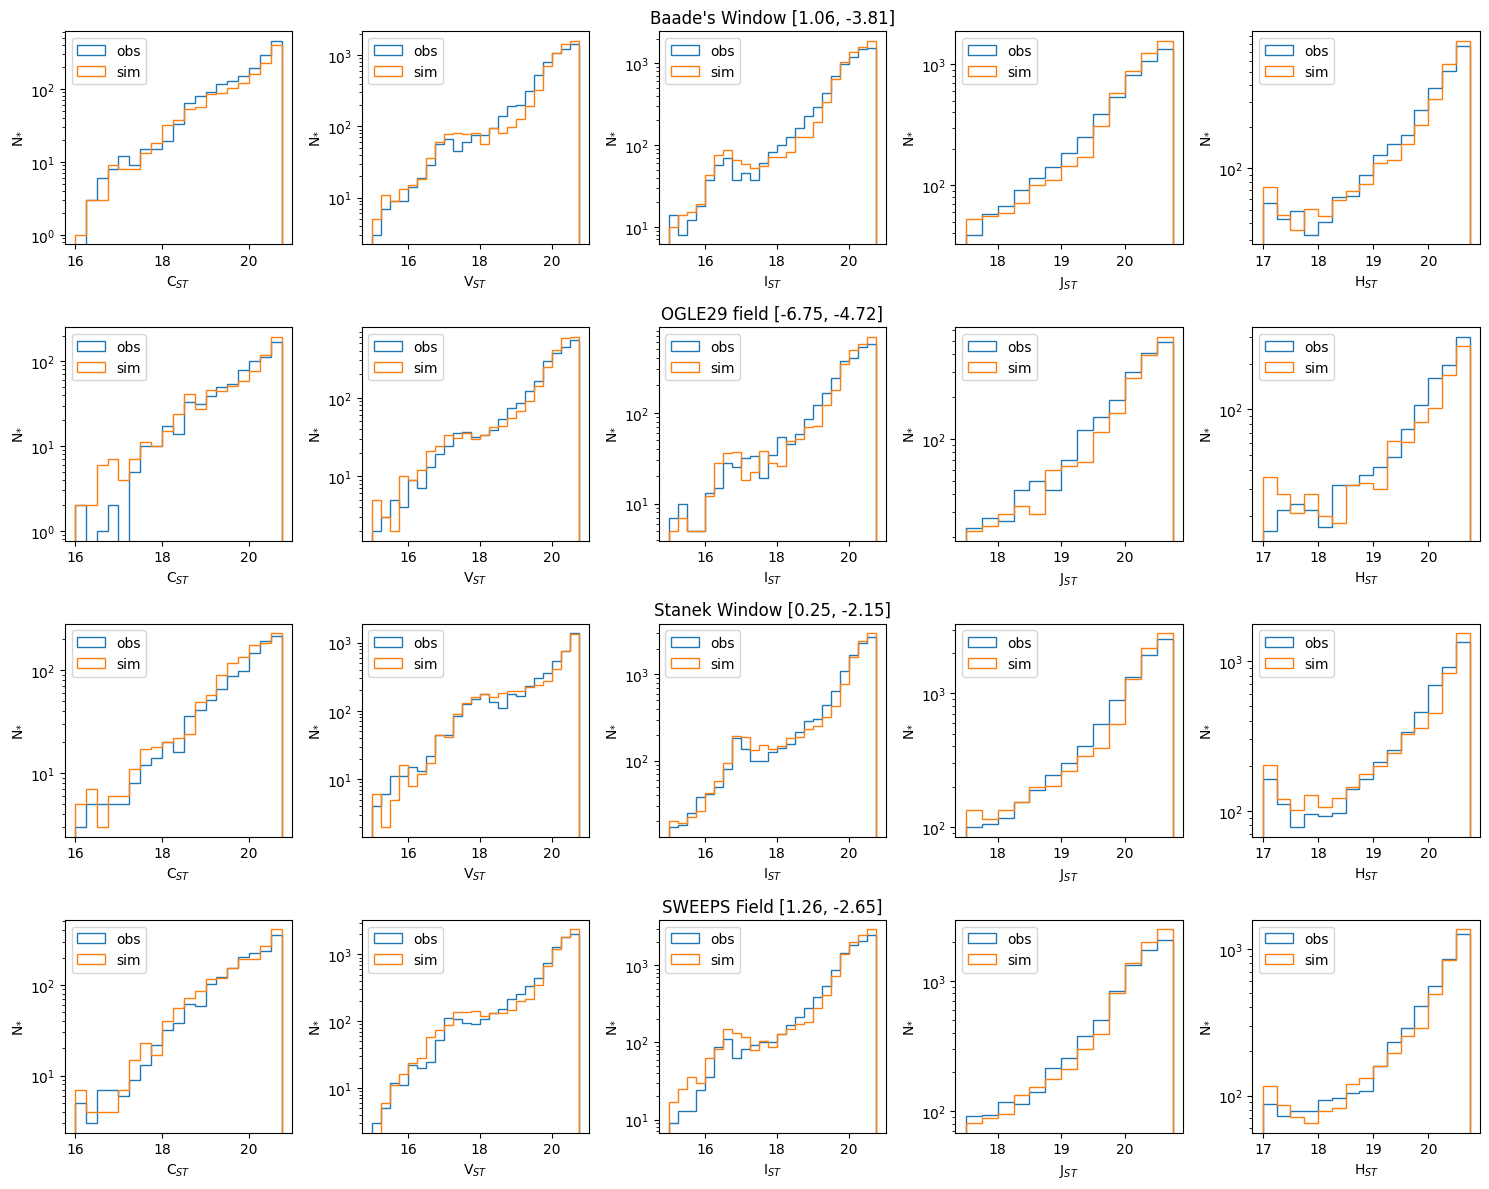

In [14]:
filt_list = {'C':'WFC3_UVIS_F390W','V':'WFC3_UVIS_F555W','I':'WFC3_UVIS_F814W','J':'WFC3_IR_F110W','H':'WFC3_IR_F160W'}
filt_lims = {'C':[16,21],'V':[15,21],'I':[15,21],'J':[17.5,21],'H':[17,21]}
plt.subplots(nrows=4,ncols=5,figsize=(15,12))
for i,field in enumerate(fields):
    j=0
    for filt in filt_list.keys():
        plt.subplot(4,5,1+j+5*i)
        if j==2:
            plt.title(field_names[i]+' '+str(coords[i]))
        bins = np.arange(*filt_lims[filt],0.25)
        plt.hist(odats[i][filt+'MAG'],bins=bins,histtype='step',label='obs')
        #plt.plot(bins[1:]-, dhist[0]*ahist[0]/qhist[0])
        plt.hist(sdats[i][filt_list[filt]],bins=bins,histtype='step',label='sim')
        plt.legend()
        plt.yscale('log')
        j+=1
        plt.ylabel(r'N$_{*}$')
        plt.xlabel(filt+r'$_{ST}$')
plt.tight_layout()
plt.savefig('hst_bulgetreasury_lumfuncs.pdf')

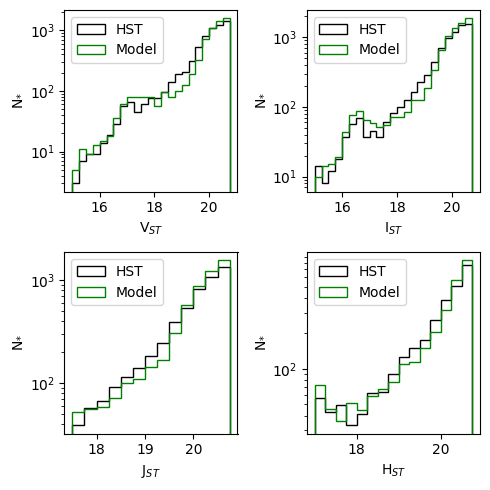

In [15]:
filt_list = {'V':'WFC3_UVIS_F555W','I':'WFC3_UVIS_F814W','J':'WFC3_IR_F110W','H':'WFC3_IR_F160W'}
filt_lims = {'V':[15,21],'I':[15,21],'J':[17.5,21],'H':[17,21]}
plt.subplots(nrows=2,ncols=2,figsize=(5,5))
#plt.suptitle(field_names[-2]+' Luminosity Functions [l,b]='+str(coords[-2])+r'$\degree$')
for i,field in enumerate([fields[-2]]):
    j=0
    for filt in filt_list.keys():
        plt.subplot(2,2,1+j+5*i)
        bins = np.arange(*filt_lims[filt],0.25)
        plt.hist(odats[i][filt+'MAG'],bins=bins,histtype='step',label='HST',color='black')
        #plt.plot(bins[1:]-, dhist[0]*ahist[0]/qhist[0])
        plt.hist(sdats[i][filt_list[filt]],bins=bins,histtype='step',label='Model',color='green')
        plt.legend()
        plt.yscale('log')
        j+=1
        plt.ylabel(r'N$_{*}$')
        plt.xlabel(filt+r'$_{ST}$')
plt.tight_layout()
plt.savefig('hst_bulgetreasury_example_new.pdf')

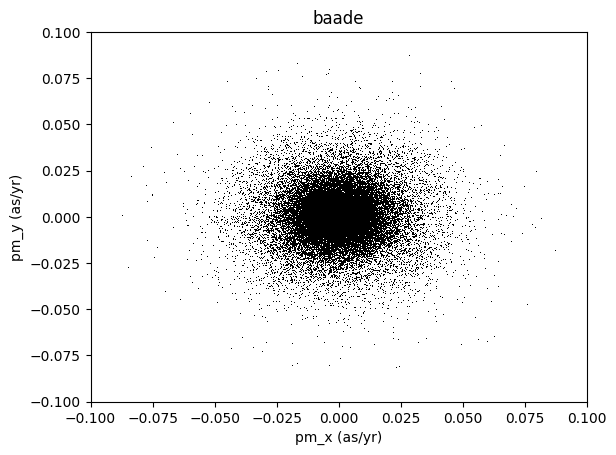

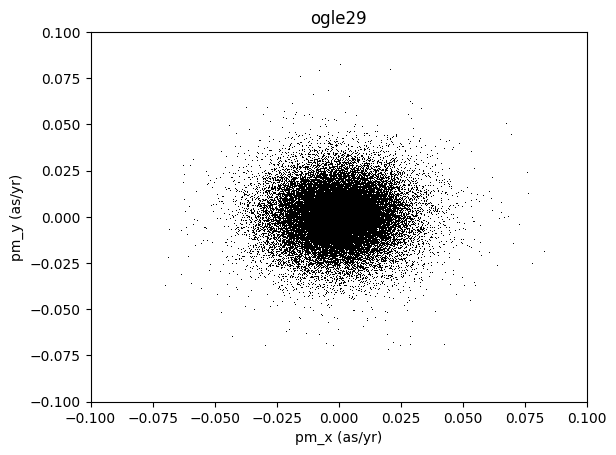

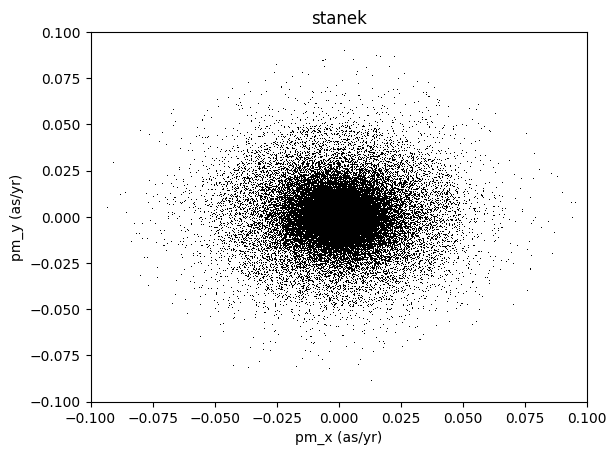

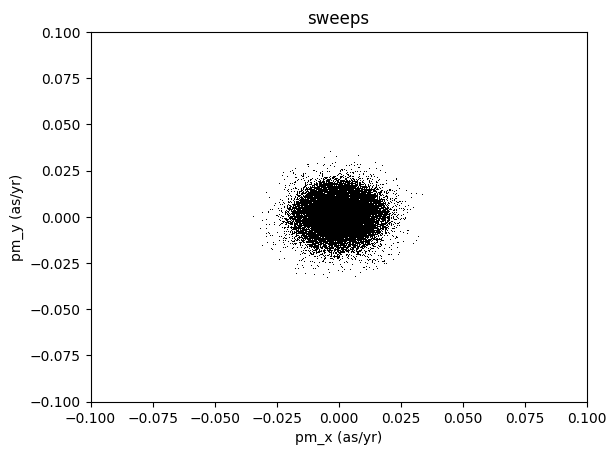

In [55]:
for i,field in enumerate(fields):
    plt.figure()
    plt.title(field)
    plt.plot(odats[i]['PPMX']*0.03/t_base[i],odats[i]['PPMY']*0.03/t_base[i], 'k,')
    plt.xlim(-0.1,0.1)
    plt.ylim(-0.1,0.1)
    plt.xlabel('pm_x (as/yr)'); plt.ylabel('pm_y (as/yr)')
    #plt.plot(bins[1:]-, dhist[0]*ahist[0]/qhist[0])
    #plt.hist(sdats[i]['WFC3_UVIS_F814W'],bins=bins,histtype='step',label='sim')

N stars 11109 13391
N stars 4182 4380
N stars 21597 26596
N stars 18518 21865


/var/folders/_z/fn__fgrs2wqgsmbvw8bvrr0r0000gn/T/ipykernel_31527/270563624.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


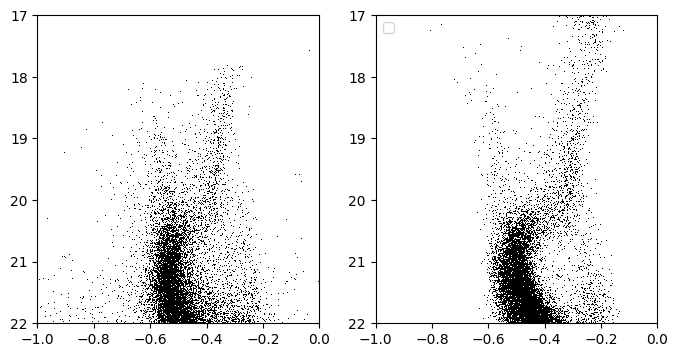

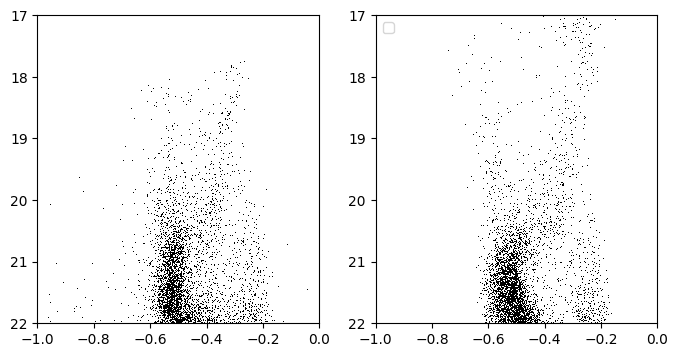

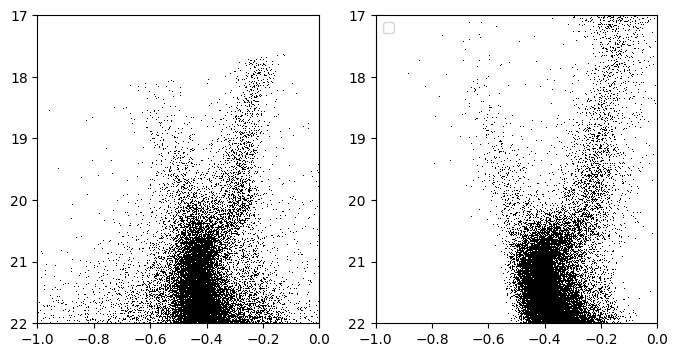

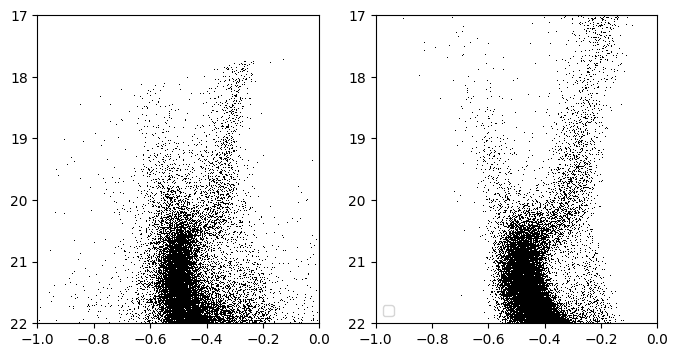

In [71]:
bins = np.arange(15,35,0.5)
for i,field in enumerate(fields):
    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(8,4))
    ax[0].plot(odats[i]['JMAG']-odats[i]['HMAG'],odats[i]['HMAG'], 'k,')
    ax[1].plot(sdats[i]['WFC3_IR_F110W']-sdats[i]['WFC3_IR_F160W'],sdats[i]['WFC3_IR_F160W'], 'k,')
    for axi in ax:
        axi.set_xlim(-1,0)
        axi.set_ylim(22,17)
    print('N stars', sum(odats[i]['HMAG']<22), sum(sdats[i]['WFC3_IR_F160W']<22))
    #plt.plot(bins[1:]-, dhist[0]*ahist[0]/qhist[0])
    #plt.hist(sdats[i]['WFC3_UVIS_F814W'],bins=bins,histtype='step',label='sim')
    plt.legend()